## 1. 패키지, 데이터 불러오기


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [47]:
# 원본 데이터 로드
games = pd.read_csv("Data/games.csv", parse_dates=["GAME_DATE_EST"])
games_details = pd.read_csv("Data/games_details.csv", low_memory=False)
details = games_details  # 변수명 통일을 위한 alias
teams = pd.read_csv("Data/teams.csv")
player = pd.read_csv("Data/players.csv")
ranking = pd.read_csv("Data/ranking.csv")

# 경고 메시지 제거
warnings.filterwarnings('ignore')

### 필요로 하는 CSV 파일의 컬럼들
---
#### 지인 - 2015년 GSW 의 플레이오프 우승 시점을 기준으로 시즌별 승률 상승 요인 분석
- games.csv: 'GAME_ID', 'SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS'
- games_details.csv: 'GAME_ID', 'TEAM_ID', 'FG_PCT', 'FG3_PCT', 'FGA', 'OREB', 'TO', 'FTA', 'PTS'
- teams.csv: 'TEAM_ID', 'ABBREVIATION'

#### 수임 - Golden State Warriors 우승 시즌과 이전 시즌의 스타팅 라인업 및 주요 선수 활용 변화 분석
- games.csv: 'GAME_ID', 'SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS'
- games_details.csv: 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_NAME', 'START_POSITION', 'MIN'
- teams.csv: 'TEAM_ID', 'ABBREVIATION'


## 2. 분석관점


### 지인 - 2015년 GSW 의 플레이오프 우승 시점을 기준으로 시즌별 승률 상승 요인 분석

**분석 내용**
- GSW의 공격 효율성과 수비 효율성이 승률에 얼마나 영향을 미치는지 분석

**분석 목표**
- 2015년 우승을 기점으로 2012년부터 승률이 점점 높아지면서 팀의 어떤 부분이 승률에 영향을 주었는지 분석
- 우리팀의 공격 효율성 상승이 승률에 영향을 미쳤을까?
- 우리팀의 수비 효율성 상승이 승률에 영향을 미쳤을까?


### 수임 - Golden State Warriors 우승 시즌과 이전 시즌의 스타팅 라인업 및 주요 선수 활용 변화 분석

**Title**: 우승 시즌에 어떤 선수를 어떻게 썼길래 결과가 달라졌을까?

**목적**
- "GSW팀의 우승 시즌과 이전 시즌의 스타팅 라인업 및 주요 선수 활용이 어떻게 달라졌는가?"

**분석 내용**
1. 우승 이전 시즌 vs 우승 시즌의 스타팅 멤버 비교
2. 이전 시즌 대비 출전 시간이 늘어난 선수 분석


## 3. 데이터 이해


In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          2655

In [49]:
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1


In [50]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [51]:
details.head(1)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0


In [52]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [53]:
# 팀 약어 리스트
teams['ABBREVIATION'].unique()
# GSW

array(['ATL', 'BOS', 'NOP', 'CHI', 'DAL', 'DEN', 'HOU', 'LAC', 'LAL',
       'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX',
       'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET',
       'CHA', 'CLE', 'GSW'], dtype=object)

In [54]:
#TEAM_ID
teams[teams['ABBREVIATION'] == 'GSW']

# TEAM_ID = 1610612744

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
29,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors


## 4. 전처리


### 지인


In [55]:
# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [56]:
# games 테이블 전처리
games = games.drop_duplicates(subset=['GAME_ID'], keep='first')
games['HOME_TEAM_WINS'] = games['HOME_TEAM_WINS'].dropna()
games['FG3_PCT_home'] = games['FG3_PCT_home'].fillna(0)
games['PTS_home'] = pd.to_numeric(games['PTS_home'], errors='coerce').fillna(0).astype(int)
games['AST_home'] = pd.to_numeric(games['AST_home'], errors='coerce').fillna(0).astype(int)
games['REB_home'] = pd.to_numeric(games['REB_home'], errors='coerce').fillna(0).astype(int)
games['PTS_away'] = pd.to_numeric(games['PTS_away'], errors='coerce').fillna(0).astype(int)
games['AST_away'] = pd.to_numeric(games['AST_away'], errors='coerce').fillna(0).astype(int)
games['REB_away'] = pd.to_numeric(games['REB_away'], errors='coerce').fillna(0).astype(int)
games['GAME_STATUS_TEXT'] = games['GAME_STATUS_TEXT'].astype('string').fillna('')

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26622 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26622 non-null  datetime64[ns]
 1   GAME_ID           26622 non-null  int64         
 2   GAME_STATUS_TEXT  26622 non-null  string        
 3   HOME_TEAM_ID      26622 non-null  int64         
 4   VISITOR_TEAM_ID   26622 non-null  int64         
 5   SEASON            26622 non-null  int64         
 6   TEAM_ID_home      26622 non-null  int64         
 7   PTS_home          26622 non-null  int64         
 8   FG_PCT_home       26523 non-null  float64       
 9   FT_PCT_home       26523 non-null  float64       
 10  FG3_PCT_home      26622 non-null  float64       
 11  AST_home          26622 non-null  int64         
 12  REB_home          26622 non-null  int64         
 13  TEAM_ID_away      26622 non-null  int64         
 14  PTS_away          26622 non

In [57]:
# games_details 테이블 전처리
games_details['FG3A'] = pd.to_numeric(games_details['FG3A'], errors='coerce').fillna(0).astype(int)
games_details['FG3M'] = pd.to_numeric(games_details['FG3M'], errors='coerce').fillna(0).astype(int)
games_details['FG3_PCT'] = pd.to_numeric(games_details['FG3_PCT'], errors='coerce').fillna(0)
games_details['COMMENT'] = games_details['COMMENT'].astype('string').fillna('')
games_details['MIN'] = games_details['MIN'].astype('string').fillna('00:00')
games_details['TEAM_ABBREVIATION'] = games_details['TEAM_ABBREVIATION'].astype('string').fillna('')
games_details['TEAM_CITY'] = games_details['TEAM_CITY'].astype('string').fillna('')
games_details['PLAYER_NAME'] = games_details['PLAYER_NAME'].astype('string').fillna('')
games_details['NICKNAME'] = games_details['NICKNAME'].astype('string').fillna('')
games_details['START_POSITION'] = games_details['START_POSITION'].astype('string').fillna('')
games_details['OREB'] =  pd.to_numeric(games_details['OREB'], errors='coerce').fillna(0).astype(int)
games_details['DREB'] =  pd.to_numeric(games_details['DREB'], errors='coerce').fillna(0).astype(int)
games_details['AST'] =  pd.to_numeric(games_details['AST'], errors='coerce').fillna(0).astype(int)
games_details['STL'] =  pd.to_numeric(games_details['STL'], errors='coerce').fillna(0).astype(int)
games_details['BLK'] =  pd.to_numeric(games_details['BLK'], errors='coerce').fillna(0).astype(int)
games_details['PF'] =  pd.to_numeric(games_details['PF'], errors='coerce').fillna(0).astype(int)
games_details['PTS'] =  pd.to_numeric(games_details['PTS'], errors='coerce').fillna(0).astype(int)
games_details['FGM'] =  pd.to_numeric(games_details['FGM'], errors='coerce').fillna(0).astype(int)
games_details['FGA'] =  pd.to_numeric(games_details['FGA'], errors='coerce').fillna(0).astype(int)
games_details['FTM'] =  pd.to_numeric(games_details['FTM'], errors='coerce').fillna(0).astype(int)
games_details['FTA'] =  pd.to_numeric(games_details['FTA'], errors='coerce').fillna(0).astype(int)
games_details['TO'] =  pd.to_numeric(games_details['TO'], errors='coerce').fillna(0).astype(int)
games_details['REB'] =  pd.to_numeric(games_details['REB'], errors='coerce').fillna(0).astype(int)
games_details['PLUS_MINUS'] =  pd.to_numeric(games_details['PLUS_MINUS'], errors='coerce').fillna(0).astype(int)

games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  string 
 3   TEAM_CITY          668628 non-null  string 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  string 
 6   NICKNAME           668628 non-null  string 
 7   START_POSITION     668628 non-null  string 
 8   COMMENT            668628 non-null  string 
 9   MIN                668628 non-null  string 
 10  FGM                668628 non-null  int64  
 11  FGA                668628 non-null  int64  
 12  FG_PCT             558938 non-null  float64
 13  FG3M               668628 non-null  int64  
 14  FG3A               668628 non-null  int64  
 15  FG3_PCT            668628 non-null  float64
 16  FT

In [58]:
# teams 테이블 전처리
teams['ABBREVIATION'] = teams['ABBREVIATION'].astype('string').str.upper()
teams['NICKNAME'] = teams['NICKNAME'].astype('string')
teams['CITY'] = teams['CITY'].astype('string')
teams['ARENA'] = teams['ARENA'].astype('string')
teams['OWNER'] = teams['OWNER'].astype('string')
teams['HEADCOACH'] = teams['HEADCOACH'].astype('string')
teams['DLEAGUEAFFILIATION'] = teams['DLEAGUEAFFILIATION'].astype('string')
teams['GENERALMANAGER'] = teams['GENERALMANAGER'].astype('string')
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     string 
 5   NICKNAME            30 non-null     string 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     string 
 8   ARENA               30 non-null     string 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     string 
 11  GENERALMANAGER      30 non-null     string 
 12  HEADCOACH           30 non-null     string 
 13  DLEAGUEAFFILIATION  30 non-null     string 
dtypes: float64(1), int64(5), string(8)
memory usage: 3.4 KB


### 수임


**전처리 계획**
     1. 우승시즌과 직전 시즌 비교(우승시즌 2014-2015 -> 2015)


**사용할 컬럼** (games_details, games, teams)
1. 우승시즌비교
         SEASON
         GAME_ID
         TEAM_ID   


2. 스타팅 라인업 구성
         GAME_ID
         PLAYER_NAME == TEAM_ID로 해야함
         START_POSITION
         SEASON   

In [59]:
#사용할 컬럼 NULL값 확인하기
games[['GAME_ID', 'SEASON', 'HOME_TEAM_WINS']].isna().sum()

GAME_ID           0
SEASON            0
HOME_TEAM_WINS    0
dtype: int64

In [60]:
#GAME_ID 중복 여부 확인 -> 0
games['GAME_ID'].duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
26646    False
26647    False
26648    False
26649    False
26650    False
Name: GAME_ID, Length: 26622, dtype: bool>

In [61]:
#games테이블에 SEASON 유니크값들
games['SEASON'].unique()

array([2022, 2021, 2020, 2019, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2018, 2017, 2016, 2015, 2014])

In [62]:
#GSW가 참여한 경기 모두(홈경기 + 원정경기) => games_gsw 데이터프레임만듬
GSW_ID = 1610612744

games_gsw = games[(games['HOME_TEAM_ID'] == GSW_ID) |
                  (games['VISITOR_TEAM_ID'] == GSW_ID)]

games_gsw

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
6,2022-12-21,22200470,Final,1610612751,1610612744,2022,1610612751,143,0.643,0.875,...,42,32,1610612744,113,0.494,0.760,0.364,32,36,1
15,2022-12-20,22200463,Final,1610612752,1610612744,2022,1610612752,132,0.517,0.781,...,27,47,1610612744,94,0.473,0.923,0.343,23,29,1
30,2022-12-18,22200448,Final,1610612761,1610612744,2022,1610612761,110,0.421,0.773,...,21,43,1610612744,126,0.531,0.846,0.462,31,41,0
45,2022-12-16,22200432,Final,1610612755,1610612744,2022,1610612755,118,0.459,0.806,...,23,49,1610612744,106,0.415,0.846,0.395,31,48,1
56,2022-12-14,22200415,Final,1610612754,1610612744,2022,1610612754,125,0.506,0.840,...,30,34,1610612744,119,0.465,0.862,0.424,27,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26592,2014-10-17,11400071,Final,1610612748,1610612744,2014,1610612748,115,0.557,0.806,...,18,35,1610612744,108,0.487,0.852,0.290,26,29,1
26597,2014-10-16,11400063,Final,1610612744,1610612743,2014,1610612744,104,0.494,0.667,...,24,40,1610612743,101,0.456,0.733,0.389,18,50,1
26618,2014-10-12,11400042,Final,1610612747,1610612744,2014,1610612747,75,0.366,0.882,...,17,37,1610612744,116,0.562,0.677,0.394,33,44,0
26632,2014-10-09,11400026,Final,1610612747,1610612744,2014,1610612747,105,0.438,0.722,...,22,42,1610612744,120,0.560,0.667,0.571,27,39,0


In [63]:
#GSW의 일부 필요 컬럼을 => games_gsw_part 데이터 프레임으로 만듬
games_gsw_part = games_gsw[['GAME_ID', 'SEASON', 'HOME_TEAM_WINS']]


In [64]:
#details테이블에 위에만든 games_gsw_part 데이터 프레임의 GAME_ID 기준으로 INNER JOIN 진행
merged_gsw = details.merge(games_gsw_part, on='GAME_ID', how='inner')
merged_gsw

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS
0,22200470,1610612744,GSW,Golden State,1630228,Jonathan Kuminga,Jonathan,F,,30:15,...,6,4,1,0,4,2,4,-23,2022,1
1,22200470,1610612744,GSW,Golden State,203110,Draymond Green,Draymond,F,,23:16,...,4,6,0,0,2,2,2,-27,2022,1
2,22200470,1610612744,GSW,Golden State,1626172,Kevon Looney,Kevon,C,,16:55,...,7,1,0,0,1,3,6,-10,2022,1
3,22200470,1610612744,GSW,Golden State,1630541,Moses Moody,Moses,G,,30:55,...,1,3,1,0,0,3,17,-14,2022,1
4,22200470,1610612744,GSW,Golden State,1629673,Jordan Poole,Jordan,G,,26:11,...,1,2,1,0,7,1,13,-31,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45647,11200009,1610612744,GSW,Golden State,203145,Kent Bazemore,,,,7,...,0,1,0,0,1,0,5,0,2012,0
45648,11200009,1610612744,GSW,Golden State,202691,Klay Thompson,,,,26,...,3,4,1,0,1,2,18,0,2012,0
45649,11200009,1610612744,GSW,Golden State,203164,Lance Goulbourne,,,,7,...,3,0,0,0,2,0,0,0,2012,0
45650,11200009,1610612744,GSW,Golden State,2210,Richard Jefferson,,,,16,...,5,2,0,1,0,3,9,0,2012,0


In [65]:
#GSW만 필터링작업
gsw = merged_gsw[merged_gsw['TEAM_ABBREVIATION'] == 'GSW'].copy()
gsw.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS
0,22200470,1610612744,GSW,Golden State,1630228,Jonathan Kuminga,Jonathan,F,,30:15,...,6,4,1,0,4,2,4,-23,2022,1
1,22200470,1610612744,GSW,Golden State,203110,Draymond Green,Draymond,F,,23:16,...,4,6,0,0,2,2,2,-27,2022,1
2,22200470,1610612744,GSW,Golden State,1626172,Kevon Looney,Kevon,C,,16:55,...,7,1,0,0,1,3,6,-10,2022,1
3,22200470,1610612744,GSW,Golden State,1630541,Moses Moody,Moses,G,,30:55,...,1,3,1,0,0,3,17,-14,2022,1
4,22200470,1610612744,GSW,Golden State,1629673,Jordan Poole,Jordan,G,,26:11,...,1,2,1,0,7,1,13,-31,2022,1


In [66]:
#우승 직전/후로 나뉘니까 2016부터는 데이터 불필요.
gsw = gsw[gsw['SEASON'] <= 2015]

In [67]:
#우승시즌 2014-2015, 우승직전시즌 전체
#champioship 2014-2015 우승시즌
#pre-championship 2013-2014 우승전 시즌
def season_group(season):
    if season == 2014:  # SEASON=2014를 우승시즌으로
        return "championship(2014-2015)"
    elif season == 2013:  # SEASON=2013을 직전시즌으로
        return "pre-championship(2013-2014)"

gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)

In [68]:
#MIN(출전시간) 데이터 셋 확인
# MIN                      str
details.dtypes

GAME_ID                       int64
TEAM_ID                       int64
TEAM_ABBREVIATION    string[python]
TEAM_CITY            string[python]
PLAYER_ID                     int64
PLAYER_NAME          string[python]
NICKNAME             string[python]
START_POSITION       string[python]
COMMENT              string[python]
MIN                  string[python]
FGM                           int64
FGA                           int64
FG_PCT                      float64
FG3M                          int64
FG3A                          int64
FG3_PCT                     float64
FTM                           int64
FTA                           int64
FT_PCT                      float64
OREB                          int64
DREB                          int64
REB                           int64
AST                           int64
STL                           int64
BLK                           int64
TO                            int64
PF                            int64
PTS                         

In [69]:
#문자열 --> 숫자로 변환. 분단위의 실수로 계산
def min_to_float(x):
    if pd.isna(x):
        return 0

    x = str(x)

    if ':' in x:                         # "32:11"같은 형태
        m, s = x.split(':')
        return int(m) + int(s) / 60

    if x.isdigit():                      # "12" 같은 형태
        return int(x)

    return 0
gsw['MIN_FLOAT'] = gsw['MIN'].apply(min_to_float)

In [70]:
gsw['MIN_FLOAT']

6955     46.900000
6956     35.050000
6957     17.750000
6958     43.883333
6959     44.833333
           ...    
45647     7.000000
45648    26.000000
45649     7.000000
45650    16.000000
45651     6.000000
Name: MIN_FLOAT, Length: 14798, dtype: float64

In [71]:
#소수점 2자리 반올림
gsw['MIN_FLOAT'] = gsw['MIN_FLOAT'].round(2)
gsw['MIN_FLOAT']

6955     46.90
6956     35.05
6957     17.75
6958     43.88
6959     44.83
         ...  
45647     7.00
45648    26.00
45649     7.00
45650    16.00
45651     6.00
Name: MIN_FLOAT, Length: 14798, dtype: float64

In [72]:
#위 사용했던 시즌 그룹 사용
gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)


## 5. EDA & 시각화


### 지인


# 2003년 부터 2018년까지의 승률 변화

In [73]:
# gsw team id
gsw_team_id = 1610612744

In [74]:
# 2018년 이하 시즌만 필터링
# gsw 이긴 홈 경기
home_games = games[(games['HOME_TEAM_ID'] == gsw_team_id) & (games['SEASON'] <= 2018)].copy()
home_games['WIN'] = home_games['HOME_TEAM_WINS']
home_games['TEAM_ID'] = gsw_team_id

# gsw 이긴 원정 경기
away_games = games[(games['VISITOR_TEAM_ID'] == gsw_team_id) & (games['SEASON'] <= 2018)].copy()
away_games['WIN'] = 1 - away_games['HOME_TEAM_WINS']
away_games['TEAM_ID'] = gsw_team_id

# 홈+원정 경기 합치기
gsw_all = pd.concat([home_games, away_games], ignore_index=True)

In [75]:
# 시즌별 승률 계산
season_stats = gsw_all.groupby('SEASON').agg({
    'WIN': ['sum', 'count', 'mean']
}).reset_index()

# 컬럼 재정의
season_stats.columns = ['SEASON', 'WINS', 'GAMES', 'WIN_PCT']

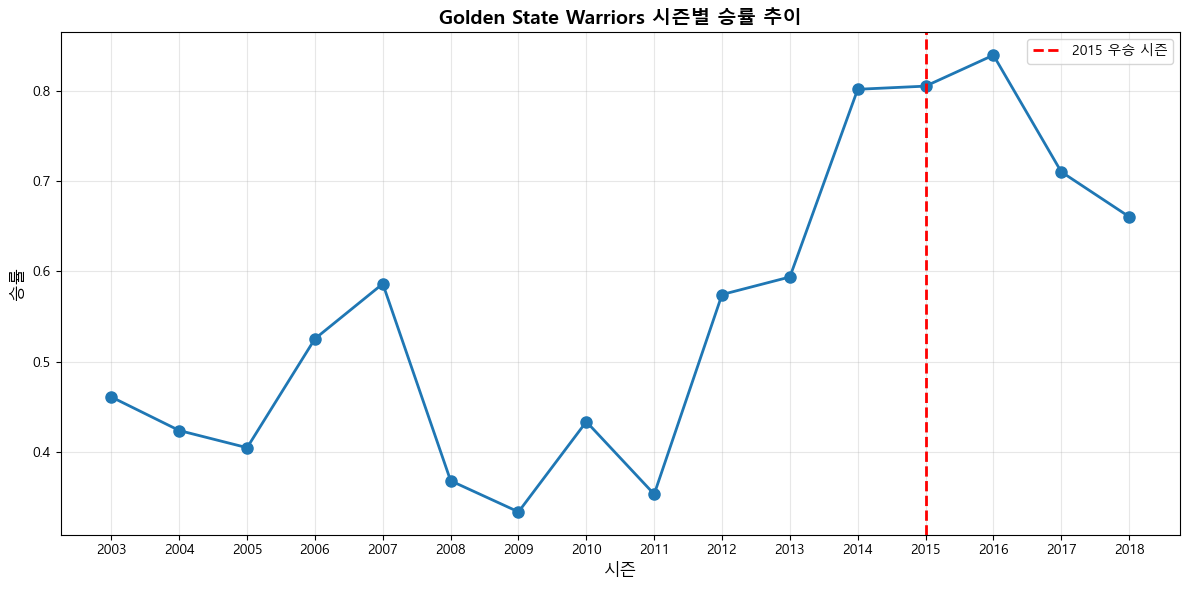

In [76]:
# 시즌별 승률 그래프
plt.figure(figsize=(12, 6))
plt.plot(season_stats['SEASON'], season_stats['WIN_PCT'],
         marker='o', linewidth=2, markersize=8)

# 2015 우승 시즌 기점
if 2015 in season_stats['SEASON'].values:
    plt.axvline(x=2015, color='red', linestyle='--',
                label='2015 우승 시즌', linewidth=2)

# 모든 시즌 년도 표시
plt.xticks(season_stats['SEASON'])

plt.xlabel('시즌', fontsize=12)
plt.ylabel('승률', fontsize=12)
plt.title('Golden State Warriors 시즌별 승률 추이', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

2015년 GSW의 우승 시점을 기준으로 2012년부터 승률이 오르기 시작하다가 2015년 우승을 했고 2016년쯤 부터 다시 하락하기 시작합니다.   
저는 2015년 우승을 기점으로 2012년부터 승률이 점점 높아지면서 팀의 어떤 부분이 승률에 영향을 주었는지 분석 해보겠습니다.

In [77]:
merged_all = gsw_all.merge(games_details, on='GAME_ID', how='inner')

basic_stats = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'PLUS_MINUS', 'FGM', 'FGA', 'FG3M', 'FTA']
season_stats = merged_all.groupby(['SEASON'])[basic_stats].mean(numeric_only=True).reset_index()
season_stats

# 공격 효율성(TS%) 계산
season_stats['TS%'] = season_stats['PTS'] / (2 * (season_stats['FGA'] + 0.44 * season_stats['FTA'])) * 100
season_stats[['SEASON', 'TS%']]


,SEASON,TS%
0,2003,51.681482
1,2004,52.104934
2,2005,52.827101
3,2006,55.086095
4,2007,55.010566
5,2008,55.094082
6,2009,56.300863
7,2010,54.830612
8,2011,53.909044
9,2012,53.438554


#### 1. GSW의 공격율이 승률에 영향을 미쳤을까?
NBA에서는 공격력을 공격 효율성으로 표현합니다.

**공격 효율성(Offensive Rating)이란?**
- 100 포제션당 득점을 의미
- TS%(True Shooting Percentage): 2점슛, 3점슛, 자유투를 모두 고려한 슛 효율성


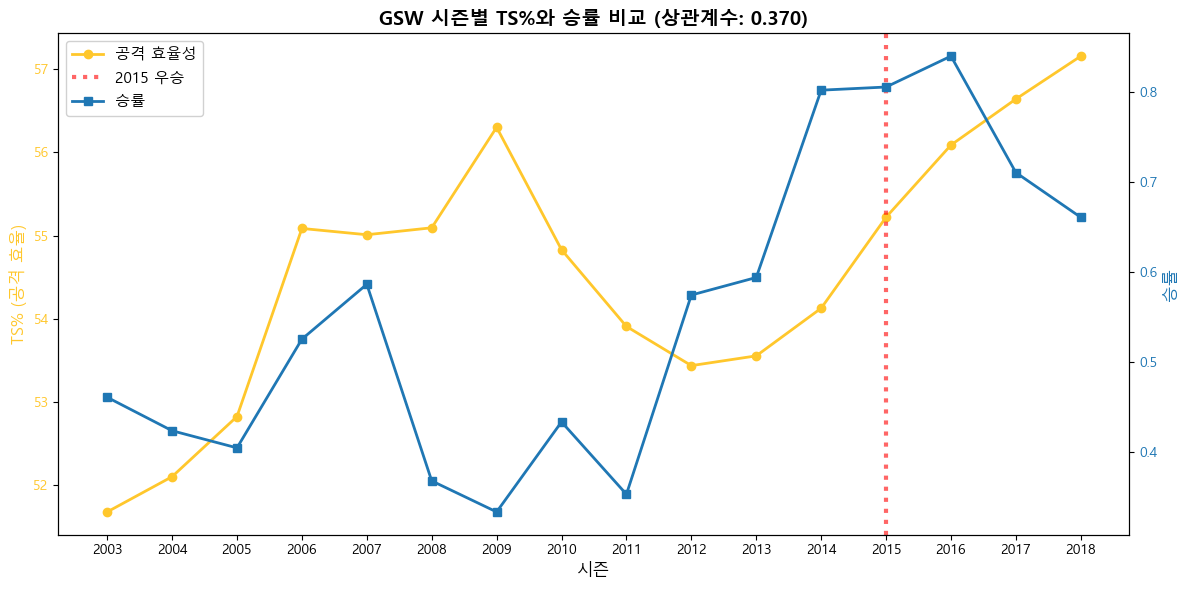

TS%와 승률의 상관계수: 0.370


In [78]:
# 시즌별 승률 계산 (gsw_all에서)
win_stats = gsw_all.groupby('SEASON').agg({
    'WIN': 'mean'
}).reset_index()
win_stats.columns = ['SEASON', 'WIN_PCT']

# TS%와 승률 병합
corr_data = season_stats[['SEASON', 'TS%']].merge(win_stats, on='SEASON')

# 상관관계 계산
correlation = corr_data['TS%'].corr(corr_data['WIN_PCT'])

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# TS% (왼쪽 y축)
color1 = '#FFC72C'
ax1.set_xlabel('시즌', fontsize=12)
ax1.set_ylabel('TS% (공격 효율)', color=color1, fontsize=12)
ax1.plot(corr_data['SEASON'], corr_data['TS%'], color=color1, marker='o', linewidth=2, label='공격 효율성')
ax1.tick_params(axis='y', labelcolor=color1)

# 2015 우승 시즌 강조
ax1.axvline(x=2015, color='red', linestyle=':',
            linewidth=3, alpha=0.6, label='2015 우승')

# 승률 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('승률', color=color2, fontsize=12)
ax2.plot(corr_data['SEASON'], corr_data['WIN_PCT'], color=color2, marker='s', linewidth=2, label='승률')
ax2.tick_params(axis='y', labelcolor=color2)

# 모든 시즌 년도 표시
ax1.set_xticks(corr_data['SEASON'])

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           loc='upper left', fontsize=11, framealpha=0.9)

plt.title(f'GSW 시즌별 TS%와 승률 비교 (상관계수: {correlation:.3f})', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

print(f"TS%와 승률의 상관계수: {correlation:.3f}")

## 상관계수 해석

**TG% (True Shooting %)**는 공격 효율성을 의미합니다.
- 값이 **높을수록** 공격이 좋음
- 값이 **낮을수록** 공격이 나쁨

| 상관계수 | 해석 |
|---------|------|
| 0.7 ~ 1.0 | 강한 양의 상관관계 |
| 0.3 ~ 0.7 | 중간 양의 상관관계 |
| -0.3 ~ 0.3 | 약한 상관관계 |

공격 효율성에 대한 분석 결과를 보면, 상관계수가 0.370으로 승률과 약한 상관관계를 보입니다.   
따라서 우리팀의 공격 효율성이 승률에는 큰 영향을 미치지 않은 것으로 판단됩니다.

#### 2. 우리팀의 수비 효율성 상승이 승률에 영향을 미쳤을까?


In [79]:
# 시즌별 팀 스탯 그룹핑
season_sums = merged_all.groupby('SEASON')[['FGA', 'OREB', 'TO', 'FTA']].sum()

# 시즌별 상대팀 PTS 계산
# GSW 홈 경기 → 상대팀 PTS = PTS_away
# GSW 원정 경기 → 상대팀 PTS = PTS_home
gsw_home = gsw_all[gsw_all['HOME_TEAM_ID'] == gsw_team_id].copy()
gsw_home['opp_PTS'] = gsw_home['PTS_away']

gsw_away = gsw_all[gsw_all['VISITOR_TEAM_ID'] == gsw_team_id].copy()
gsw_away['opp_PTS'] = gsw_away['PTS_home']

opp_pts = pd.concat([gsw_home, gsw_away])
season_sums['opp_PTS'] = opp_pts.groupby('SEASON')['opp_PTS'].sum()

# 포제션 계산: FGA - OREB + TO + (0.4 * FTA)
season_sums['possessions'] = (
    season_sums['FGA']
    - season_sums['OREB']
    + season_sums['TO']
    + (0.4 * season_sums['FTA'])
)

# 수비 효율성 (Defensive Rating) 계산
season_sums['defensive_rating'] = (season_sums['opp_PTS'] / season_sums['possessions']) * 100

season_sums

,FGA,OREB,TO,FTA,opp_PTS,possessions,defensive_rating
SEASON,,,,,,,
2003,13141,1983,2255,3903,7709,14974.2,51.481882
2004,14365,2198,2386,4177,8536,16223.8,52.614061
2005,14580,2141,2569,4837,8896,16942.8,52.506079
2006,16739,2458,3364,5624,10570,19894.6,53.129995
2007,15300,2229,2585,4761,9477,17560.4,53.968019
2008,15174,2246,2557,5039,9721,17500.6,55.546667
2009,15454,2029,2866,4936,10058,18265.4,55.065862
2010,15169,2200,2706,4403,9470,17436.2,54.312293
2011,11184,1549,1915,3081,6869,12782.4,53.737952


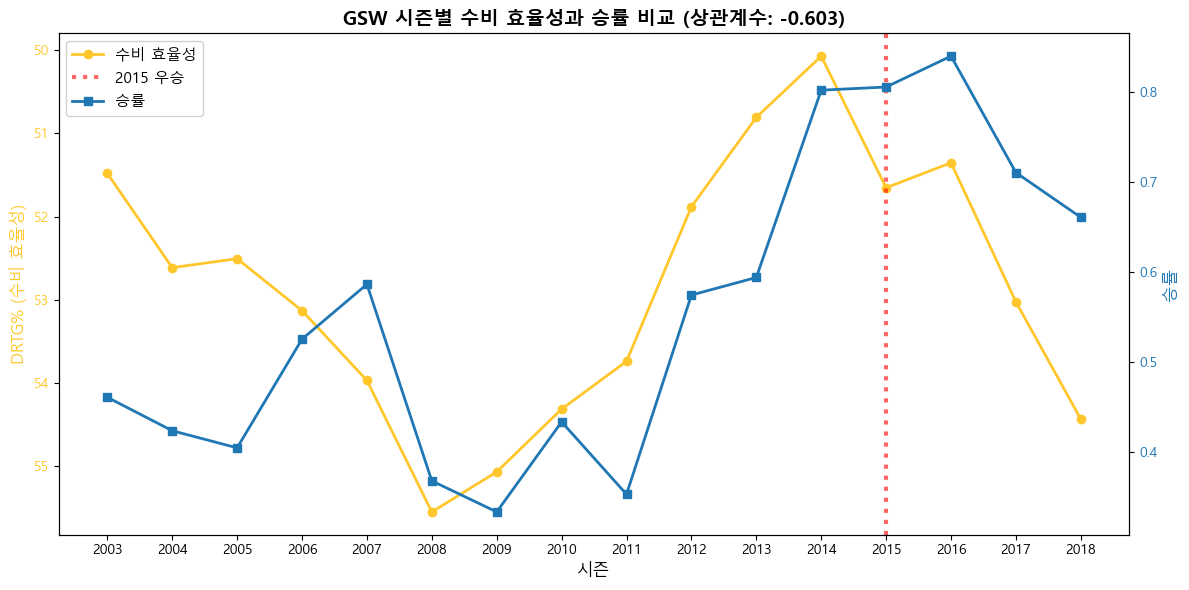

수비 효율성과 승률의 상관계수: -0.603


In [80]:
# 승률과 수비효율성 상관관계 그래프

# 시즌별 승률 계산
win_stats = gsw_all.groupby('SEASON').agg({'WIN': 'mean'}).reset_index()
win_stats.columns = ['SEASON', 'WIN_PCT']

# defensive_rating과 승률 병합
defense_corr = season_sums.reset_index()[['SEASON', 'defensive_rating']].merge(win_stats, on='SEASON')

# 상관관계 계산
correlation = defense_corr['defensive_rating'].corr(defense_corr['WIN_PCT'])

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# Defensive Rating (왼쪽 y축) - 낮을수록 좋음
color1 = '#FFC72C'
ax1.set_xlabel('시즌', fontsize=12)
ax1.set_ylabel('DRTG% (수비 효율성)', color=color1, fontsize=12)
ax1.plot(defense_corr['SEASON'], defense_corr['defensive_rating'], color=color1, marker='o', linewidth=2, label='수비 효율성')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.invert_yaxis()  # 수비 효율성은 낮을수록 좋으므로 y축 반전

# 2015 우승 시즌 강조
ax1.axvline(x=2015, color='red', linestyle=':',
            linewidth=3, alpha=0.6, label='2015 우승')

# 승률 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('승률', color=color2, fontsize=12)
ax2.plot(defense_corr['SEASON'], defense_corr['WIN_PCT'], color=color2, marker='s', linewidth=2, label='승률')
ax2.tick_params(axis='y', labelcolor=color2)

# 모든 시즌 년도 표시
ax1.set_xticks(defense_corr['SEASON'])

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           loc='upper left', fontsize=11, framealpha=0.9)

plt.title(f'GSW 시즌별 수비 효율성과 승률 비교 (상관계수: {correlation:.3f})', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

print(f"수비 효율성과 승률의 상관계수: {correlation:.3f}")

## 상관계수 해석

**Defensive Rating**은 100 포제션당 상대팀 실점을 의미합니다.
- 값이 **낮을수록** 수비가 좋음
- 값이 **높을수록** 수비가 나쁨

| 상관계수 | 해석 |
|---------|------|
| -1.0 ~ -0.7 | 강한 음의 상관관계 |
| -0.7 ~ -0.3 | 중간 음의 상관관계 |
| -0.3 ~ 0.3 | 약한 상관관계 |

수비 효율성과 승률의 상관계수는 -0.603으로 중간 정도의 상관 관계를 보입니다. 수비 효율성은 포제션 100 당 우리팀의 실점이므로 낮을 수록 수비를 잘 했다는 의미 입니다.   
공격 효율성과 수비 효율성을 승률과 비교했을 때, 결과적으로 공격 효율성도 승률과 약한 상관관계를 가지지만 수비 효율성이 더 높은 상관관계를 가지므로 수비 효율성이 팀의 승률에 더 영향을 미쳤다고 볼 수 있습니다.   


### 수임


#### 1. 우승 이전 시즌 vs 우승 시즌의 스타팅 멤버 TOP5 비교
우승 직전과 우승 시즌의 핵심 멤버가 누구인지 한눈에 파악


In [81]:
#스타팅 라인업 -> START_POSITION 값이 있는 것만
starters = gsw[(gsw['START_POSITION'].notna()) & (gsw['START_POSITION'] != '')]
starters

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS,SEASON_GROUP,MIN_FLOAT
6955,20801229,1610612744,GSW,Golden State,101235,Kelenna Azubuike,,F,,46:54,...,1,4,1,3,18,-3,2008,1,None,46.90
6956,20801229,1610612744,GSW,Golden State,201576,Anthony Randolph,,F,,35:03,...,0,0,1,4,14,-3,2008,1,None,35.05
6957,20801229,1610612744,GSW,Golden State,101142,Ronny Turiaf,,C,,17:45,...,1,0,3,4,8,-1,2008,1,None,17.75
6958,20801229,1610612744,GSW,Golden State,201627,Anthony Morrow,,G,,43:53,...,0,0,2,2,33,4,2008,1,None,43.88
6959,20801229,1610612744,GSW,Golden State,201228,C.J. Watson,,G,,44:50,...,3,1,3,4,20,0,2008,1,None,44.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45429,21200010,1610612744,GSW,Golden State,203084,Harrison Barnes,,F,,13:48,...,0,0,0,1,6,-2,2012,0,None,13.80
45430,21200010,1610612744,GSW,Golden State,101135,David Lee,,F,,39:15,...,0,1,1,4,6,3,2012,0,None,39.25
45431,21200010,1610612744,GSW,Golden State,101106,Andrew Bogut,,C,,18:29,...,0,1,0,1,8,-7,2012,0,None,18.48
45432,21200010,1610612744,GSW,Golden State,202691,Klay Thompson,,G,,33:45,...,0,0,4,2,16,-10,2012,0,None,33.75


In [82]:
#시즌별 스타팅 횟수 집계
starter_count = (starters.groupby(['SEASON_GROUP', 'PLAYER_NAME']).size().reset_index(name='start_games'))
starter_count.head(10)

,SEASON_GROUP,PLAYER_NAME,start_games
0,championship(2014-2015),Andre Iguodala,7
1,championship(2014-2015),Andrew Bogut,89
2,championship(2014-2015),David Lee,11
3,championship(2014-2015),Draymond Green,101
4,championship(2014-2015),Festus Ezeli,7
5,championship(2014-2015),Harrison Barnes,108
6,championship(2014-2015),Justin Holiday,4
7,championship(2014-2015),Klay Thompson,105
8,championship(2014-2015),Leandro Barbosa,1
9,championship(2014-2015),Marreese Speights,9


In [83]:
# 각 시즌별 스타팅 횟수가 많은 순서대로 나열.
starter_count.sort_values(['SEASON_GROUP', 'start_games'], ascending=False).head(10)

,SEASON_GROUP,PLAYER_NAME,start_games
21,pre-championship(2013-2014),Klay Thompson,88
23,pre-championship(2013-2014),Stephen Curry,85
16,pre-championship(2013-2014),David Lee,74
14,pre-championship(2013-2014),Andre Iguodala,70
15,pre-championship(2013-2014),Andrew Bogut,67
18,pre-championship(2013-2014),Harrison Barnes,24
17,pre-championship(2013-2014),Draymond Green,16
20,pre-championship(2013-2014),Jermaine O'Neal,16
22,pre-championship(2013-2014),Marreese Speights,3
19,pre-championship(2013-2014),Hilton Armstrong,1


In [84]:
# 각시즌 5명만 추리기
top_starters = (
    starter_count
    .sort_values(['SEASON_GROUP', 'start_games'], ascending=False)
    .groupby('SEASON_GROUP')
    .head(5)
)
top_starters

,SEASON_GROUP,PLAYER_NAME,start_games
21,pre-championship(2013-2014),Klay Thompson,88
23,pre-championship(2013-2014),Stephen Curry,85
16,pre-championship(2013-2014),David Lee,74
14,pre-championship(2013-2014),Andre Iguodala,70
15,pre-championship(2013-2014),Andrew Bogut,67
5,championship(2014-2015),Harrison Barnes,108
13,championship(2014-2015),Stephen Curry,108
7,championship(2014-2015),Klay Thompson,105
3,championship(2014-2015),Draymond Green,101
1,championship(2014-2015),Andrew Bogut,89


In [85]:
#pivot
plot_df = (
    top_starters
    .pivot(
        index='PLAYER_NAME',
        columns='SEASON_GROUP',
        values='start_games'
    )
)
plot_df

SEASON_GROUP,championship(2014-2015),pre-championship(2013-2014)
PLAYER_NAME,,
Andre Iguodala,NaN,70.0
Andrew Bogut,89.0,67.0
David Lee,NaN,74.0
Draymond Green,101.0,NaN
Harrison Barnes,108.0,NaN
Klay Thompson,105.0,88.0
Stephen Curry,108.0,85.0


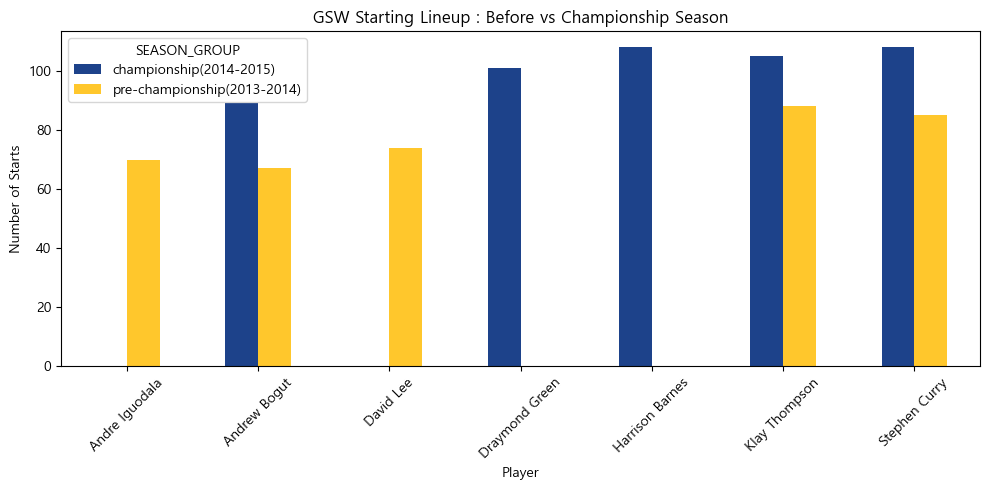

In [86]:
#막대그래프 시각화
import matplotlib.pyplot as plt

gsw_blue = '#1D428A'
gsw_yellow = '#FFC72C'

plot_df.plot(
    kind='bar',
    figsize=(10, 5),
    color=[gsw_blue, gsw_yellow]
)

plt.title("GSW Starting Lineup : Before vs Championship Season")
plt.xlabel("Player")
plt.ylabel("Number of Starts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


그래프해석
- 주전선수가 바뀌었다. Draymond Green, Harrison Barnes선수는 새롭게 주전으로 출전했다.
- Draymond green은 직전시즌에서는 스타팅 출전이 거의 없었지만 우승시즌에 가장 많은 스타팅 멤버로 출전함
- Andre iguodala와 Daivid Lee는 이전 시즌에 스타팅 멤버로 출전했으나, 우승 시즌에는 스타팅 멤버로 출전이 거의 없다.
- Stephen Curry와 Klay Thompson은 우승 전후와 상관없이 높은 스타팅 출전 횟수를 유지하고있다.
- Andrew Bogut는 우승시즌에 스타팅 멤버 출전 횟수가 소폭 상승했다.

"우승 시즌에 고정적으로 기용된 스타팅 멤버는 누구"
Andrew Bogut, Draymond Green, Harrison Barnes, Klay Thompson, Stephen Curry 이렇게 5명이고 우승에 큰 기여를 했다고 보인다.

#### 2. 이전 시즌 대비 출전 시간이 늘어난 선수 분석
GSW 우승 이전 시즌 VS 우승 시즌 평균 출전 시간이 제일 높은 선수 비교


In [87]:
#선수별 출전시간? 경기수가 각각 다르니까 평균으로 계산
avg_minute = (gsw.groupby(['SEASON_GROUP', 'PLAYER_NAME'])['MIN_FLOAT'].mean().reset_index())
avg_minute['MIN_FLOAT'] = avg_minute['MIN_FLOAT'].round(2)
avg_minute.head()

,SEASON_GROUP,PLAYER_NAME,MIN_FLOAT
0,championship(2014-2015),Aaron Craft,7.34
1,championship(2014-2015),Andre Iguodala,26.03
2,championship(2014-2015),Andrew Bogut,22.20
3,championship(2014-2015),Brandon Rush,3.48
4,championship(2014-2015),David Lee,14.06


In [88]:
#top선수만
top_minutes = (
    avg_minute
    .sort_values(['SEASON_GROUP', 'MIN_FLOAT'], ascending=False)
    .groupby('SEASON_GROUP')
    .head(5)
)
top_minutes

,SEASON_GROUP,PLAYER_NAME,MIN_FLOAT
38,pre-championship(2013-2014),Stephen Curry,35.43
32,pre-championship(2013-2014),Klay Thompson,34.89
23,pre-championship(2013-2014),David Lee,29.00
20,pre-championship(2013-2014),Andre Iguodala,27.55
27,pre-championship(2013-2014),Harrison Barnes,26.31
19,championship(2014-2015),Stephen Curry,32.64
5,championship(2014-2015),Draymond Green,31.64
11,championship(2014-2015),Klay Thompson,31.50
7,championship(2014-2015),Harrison Barnes,28.96
1,championship(2014-2015),Andre Iguodala,26.03


In [89]:
#pivot
plot_df2 = (
    top_minutes
    .pivot(
        index='PLAYER_NAME',
        columns='SEASON_GROUP',
        values='MIN_FLOAT'
    )
)
plot_df2

SEASON_GROUP,championship(2014-2015),pre-championship(2013-2014)
PLAYER_NAME,,
Andre Iguodala,26.03,27.55
David Lee,NaN,29.00
Draymond Green,31.64,NaN
Harrison Barnes,28.96,26.31
Klay Thompson,31.50,34.89
Stephen Curry,32.64,35.43


In [ ]:
#막대그래프 시각화

plot_df2.plot(
    kind='bar',
    figsize=(10, 5),
    color=[gsw_blue, gsw_yellow]
)

plt.title("GSW TOP5 Players Avg Minutes| pre-championshipn vs championship")
plt.xlabel("Player")
plt.ylabel("Average Minutes")
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

그래프 해석
- Draymond Green 선수는 이전 시즌에 출전시간이 거의 없는 것으로 보아, 새로 영입된 선수이거나 그동안 기회가 없던 선수로 보인다.
- Draymond Green은 우승 시즌에는 약 30분 이상 출전했다.
- Daivid Lee는 이전시즌에서는 출전시간이 높았지만, 우승 시즌에서는 거의 비중이 급감한 것으로 보인다.
- Harrison Barnes선수는 우승 시즌에 평균 출전 시간이 증가했다.
- Klay Thompson, Stephen Curry선수는 우승시즌에 오히려 이전 시즌보다 평균 출전시간이 줄었다.
- Andre Igudala선수는 우승 전후로 평균 출전시간이 소폭 감소하였다.

**이전 시즌 대비 출전 시간이 늘어난 선수는?
Draymond Green, Harrison Barnes선수

### 결론 인사이트

#### 지인
우리팀의 공격 효율성과 승률도 약한 상관관계가 있었으나, 수비 효율성이 승률과 더 큰 상관관계가 있었습니다.
따라서, 공격 효율성이 상대적으로 승률에 낮은 영향력을 갖기 때문에 공격 패턴의 다각화가 필요하다고 할 수 있습니다.


#### 수임
**우승 시즌에 어떤 선수를 어떻게 썼길래 결과가 달라졌을까?**

우승 시즌의 GSW팀은 팀의 기둥인 Stephen Curry와 Klay Thompson 두 명의 선수를 여전히 주축으로 활용하면서도, 다른 라인업 변화를 시도한 것으로 보입니다.

가장 눈에 띄는 변화는 Draymond Green 선수 출전입니다. 이전 시즌에는 거의 출전하지 않았던 선수가 우승 시즌에는 가장 많은 스타팅 멤버로 출전하고, 평균 출전 시간도 약 30분 이상으로 증가했습니다.

반면, David Lee와 Andre Iguodala는 이전 시즌에 스타팅 멤버였으나 우승 시즌에는 비중이 급감했습니다.

이는 감독이 기존 핵심 선수를 유지하면서도 새로운 전략적 변화를 시도했고, 그것이 우승이라는 결과로 이어졌다고 볼 수 있습니다.


### 감독 관점에서 인사이트 연관


#### 지인
감독 관점에서는 수비 전술과 시스템을 강화하는 것이 우선순위가 되어야 합니다.
공격 효율성도 중요하지만, 수비 효율성이 승률에 더 큰 영향을 미치는 것으로 분석되었기 때문에,
수비 훈련과 전술 개발에 더 많은 시간과 노력을 투자해야 할 것으로 보입니다.

또한, 공격 패턴의 다각화를 통해 상대팀이 예측하기 어려운 공격 전술을 개발하는 것도 필요합니다.


#### 수임
감독 관점에서는 기존 핵심 선수를 유지하면서도 새로운 전략적 변화를 시도하는 것이 중요합니다.

Draymond Green과 같이 잠재력 있는 선수를 발굴하고 적극적으로 기회를 주는 것,
그리고 선수들의 역할을 재배치하여 팀의 전체적인 시너지를 극대화하는 것이 우승의 열쇠였다고 볼 수 있습니다.

따라서 감독은 단순히 스타 선수에게만 의존하는 것이 아니라, 팀 전체의 밸런스와 각 선수의 강점을 최대한 활용하는 라인업 구성과 운영 전략을 수립해야 합니다.
